#### IPL MATCH PREDICTION BASED ON POWERPLAY 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings("ignore")

C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nsidd\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)

Bad key text.latex.unicode in file C:\Users\nsidd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\nsidd\Anaconda3\lib\site-packages\matplotlib\mp

In [410]:
data = pd.read_excel("IPL_2020.xlsx")

In [411]:
data.head()

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,Rising Pune Supergiant,bowl,normal,0,Rising Pune Supergiant,0,7,SPD Smith,"Maharastra Cricket Association, Pune"
2,3,2017,Rajkot,2017-04-07 00:00:00,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,Kolkata Knight Riders,bowl,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08 00:00:00,Rising Pune Supergiant,35,1,Punjab Kings,56,2,Punjab Kings,bowl,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [710]:
data.shape #946 Matches (Rows) with 19 Columns

(946, 19)

In [413]:
data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
pplay_s_t1          int64
pplay_w_t1          int64
team2              object
pplay_s_t2          int64
pplay_w_t2          int64
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object

In [414]:
df = data.copy()
df.head()

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,Rising Pune Supergiant,bowl,normal,0,Rising Pune Supergiant,0,7,SPD Smith,"Maharastra Cricket Association, Pune"
2,3,2017,Rajkot,2017-04-07 00:00:00,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,Kolkata Knight Riders,bowl,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08 00:00:00,Rising Pune Supergiant,35,1,Punjab Kings,56,2,Punjab Kings,bowl,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [415]:
df['season'].value_counts()

2013    76
2012    74
2022    74
2011    72
2010    60
2014    60
2016    60
2018    60
2020    60
2021    60
2017    59
2019    59
2008    58
2009    57
2015    57
Name: season, dtype: int64

In [416]:
print("Total Powerplay Runs scored by Team1", df['pplay_s_t1'].sum())
print("Total Powerplay Wickets lost by Team1", df['pplay_w_t1'].sum())
print("Total Powerplay Runs scored by Team2", df['pplay_s_t2'].sum())
print("Total Powerplay Wickets lost by Team2", df['pplay_w_t2'].sum())

Total Powerplay Runs scored by Team1 42925
Total Powerplay Wickets lost by Team1 1305
Total Powerplay Runs scored by Team2 44440
Total Powerplay Wickets lost by Team2 1368


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               946 non-null    int64 
 1   season           946 non-null    int64 
 2   city             939 non-null    object
 3   date             946 non-null    object
 4   team1            946 non-null    object
 5   pplay_s_t1       946 non-null    int64 
 6   pplay_w_t1       946 non-null    int64 
 7   team2            946 non-null    object
 8   pplay_s_t2       946 non-null    int64 
 9   pplay_w_t2       946 non-null    int64 
 10  toss_winner      946 non-null    object
 11  toss_decision    946 non-null    object
 12  result           946 non-null    object
 13  dl_applied       946 non-null    int64 
 14  winner           946 non-null    object
 15  win_by_runs      946 non-null    int64 
 16  win_by_wickets   946 non-null    int64 
 17  player_of_match  946 non-null    ob

In [418]:
df.head()

,id,season,city,date,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,Rising Pune Supergiant,bowl,normal,0,Rising Pune Supergiant,0,7,SPD Smith,"Maharastra Cricket Association, Pune"
2,3,2017,Rajkot,2017-04-07 00:00:00,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,Kolkata Knight Riders,bowl,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08 00:00:00,Rising Pune Supergiant,35,1,Punjab Kings,56,2,Punjab Kings,bowl,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


#### Dropping Unnecessary Columns which aren't important for our problem statement.
#### As Season, City, win_by_runs, win_by_wickets, player of the match are irrelevant to our statement.
#### We are focused to predict match winner after second Inns PP.

In [419]:
df = df.drop(['season','city','id','date','dl_applied','result','win_by_runs','win_by_wickets','player_of_match'],axis=1)
df.head()

,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,Sunrisers Hyderabad,Rajiv Gandhi Intl. Cricket Stadium
1,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,Rising Pune Supergiant,bowl,Rising Pune Supergiant,"Maharastra Cricket Association, Pune"
2,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,Kolkata Knight Riders,bowl,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,Rising Pune Supergiant,35,1,Punjab Kings,56,2,Punjab Kings,bowl,Punjab Kings,Holkar Cricket Stadium
4,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          946 non-null    object
 1   pplay_s_t1     946 non-null    int64 
 2   pplay_w_t1     946 non-null    int64 
 3   team2          946 non-null    object
 4   pplay_s_t2     946 non-null    int64 
 5   pplay_w_t2     946 non-null    int64 
 6   toss_winner    946 non-null    object
 7   toss_decision  946 non-null    object
 8   winner         946 non-null    object
 9   venue          946 non-null    object
dtypes: int64(4), object(6)
memory usage: 74.0+ KB


In [421]:
df['toss_decision'].value_counts()

bowl    560
bat     332
Bowl     38
Bat      16
Name: toss_decision, dtype: int64

In [422]:
df['toss_decision'] = df['toss_decision'].replace('Bowl','bowl') #Replacing bat & bowl
df['toss_decision'] = df['toss_decision'].replace('Bat','bat')

In [423]:
df['toss_decision'].value_counts()

bowl    598
bat     348
Name: toss_decision, dtype: int64

#### Most Wins by a team

<AxesSubplot:>

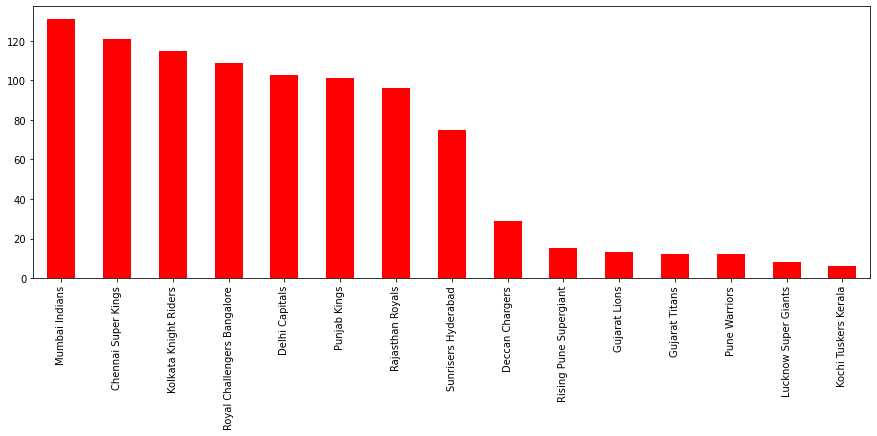

In [424]:
df['winner'].value_counts().sort_values(ascending = False).plot(kind = "bar", figsize = (15,5), color='red')

#### Now, I am considering only 8 teams as the rest of the teams are very new to the IPL edition. 

In [426]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bangalore',
              'Delhi Capitals', 'Sunrisers Hyderabad']

In [427]:
print(f'Before Removing Inconsistent Teams : {df.shape}')
df = df[(df['team1'].isin(const_teams)) & (df['team2'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {df.shape}')
print(f"Consistent Teams : \n{df['team1'].unique()}")
df.head()

Before Removing Inconsistent Teams : (946, 10)
After Removing Irrelevant Columns : (733, 10)
Consistent Teams : 
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Punjab Kings' 'Delhi Capitals' 'Mumbai Indians'
 'Chennai Super Kings' 'Rajasthan Royals']


,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,Sunrisers Hyderabad,Rajiv Gandhi Intl. Cricket Stadium
4,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium
6,Kolkata Knight Riders,59,2,Mumbai Indians,49,0,Mumbai Indians,bowl,Mumbai Indians,Wankhade Stadium
7,Royal Challengers Bangalore,23,3,Punjab Kings,62,1,Royal Challengers Bangalore,bat,Punjab Kings,Holkar Cricket Stadium
9,Sunrisers Hyderabad,34,0,Mumbai Indians,61,2,Mumbai Indians,bowl,Mumbai Indians,Wankhade Stadium


#### Encoding Winner Column as 0 if winner is from team1 or else 1 if winner is from team2

In [428]:
# if Team A is winner then it encoded 0 else 1
df.winner[df.winner == df.team1] = 0
df.winner[df.winner == df.team2] = 1

In [430]:
df.head()

,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,0,Rajiv Gandhi Intl. Cricket Stadium
4,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,0,M Chinnaswamy Stadium
6,Kolkata Knight Riders,59,2,Mumbai Indians,49,0,Mumbai Indians,bowl,1,Wankhade Stadium
7,Royal Challengers Bangalore,23,3,Punjab Kings,62,1,Royal Challengers Bangalore,bat,1,Holkar Cricket Stadium
9,Sunrisers Hyderabad,34,0,Mumbai Indians,61,2,Mumbai Indians,bowl,1,Wankhade Stadium


In [431]:
df.shape

(733, 10)

<AxesSubplot:>

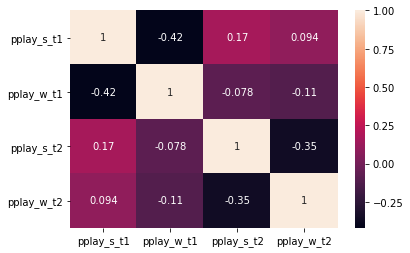

In [432]:
from seaborn import heatmap
heatmap(df.corr(), annot=True)

#### Powerplay Runs Distribution by Team1 and Team2

Powerplay Score Distribution Team 1 AxesSubplot(0.125,0.125;0.775x0.755)
Powerplay Score Distribution Team 2 AxesSubplot(0.125,0.125;0.775x0.755)


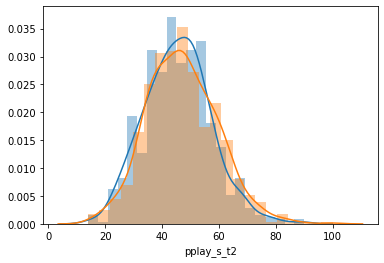

In [433]:
print("Powerplay Score Distribution Team 1",sns.distplot(df['pplay_s_t1']))
print("Powerplay Score Distribution Team 2",sns.distplot(df['pplay_s_t2']))

In [434]:
df['winner'].value_counts()

1    397
0    336
Name: winner, dtype: int64

In [435]:
df.head()

,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,0,Rajiv Gandhi Intl. Cricket Stadium
4,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,0,M Chinnaswamy Stadium
6,Kolkata Knight Riders,59,2,Mumbai Indians,49,0,Mumbai Indians,bowl,1,Wankhade Stadium
7,Royal Challengers Bangalore,23,3,Punjab Kings,62,1,Royal Challengers Bangalore,bat,1,Holkar Cricket Stadium
9,Sunrisers Hyderabad,34,0,Mumbai Indians,61,2,Mumbai Indians,bowl,1,Wankhade Stadium


In [437]:
df.head()

,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,Royal Challengers Bangalore,bowl,0,Rajiv Gandhi Intl. Cricket Stadium
4,Royal Challengers Bangalore,41,2,Delhi Capitals,43,2,Royal Challengers Bangalore,bat,0,M Chinnaswamy Stadium
6,Kolkata Knight Riders,59,2,Mumbai Indians,49,0,Mumbai Indians,bowl,1,Wankhade Stadium
7,Royal Challengers Bangalore,23,3,Punjab Kings,62,1,Royal Challengers Bangalore,bat,1,Holkar Cricket Stadium
9,Sunrisers Hyderabad,34,0,Mumbai Indians,61,2,Mumbai Indians,bowl,1,Wankhade Stadium


In [438]:
df['toss_decision'].value_counts()

bowl    470
bat     263
Name: toss_decision, dtype: int64

####  I have used Count Frequency Encoding to encode categorical columns.
####  It Considers counts of a specific category 

In [439]:
#season_dict = df.season.value_counts().to_dict()
team1_dict= df.team1.value_counts().to_dict()
team2_dict= df.team2.value_counts().to_dict()

In [440]:
toss_winner_dict = df.toss_winner.value_counts().to_dict()
venue_dict = df.venue.value_counts().to_dict()

In [441]:
#df.season = df.season.map(season_dict)
df.team1 = df.team1.map(team1_dict)
df.team2 = df.team2.map(team2_dict)
df.toss_winner = df.toss_winner.map(toss_winner_dict)
df.venue= df.venue.map(venue_dict)

In [442]:
df.head()

,team1,pplay_s_t1,pplay_w_t1,team2,pplay_s_t2,pplay_w_t2,toss_winner,toss_decision,winner,venue
0,78,59,1,101,54,1,91,bowl,0,40
4,91,41,2,104,43,2,91,bat,0,65
6,87,59,2,92,49,0,109,bowl,1,86
7,91,23,3,91,62,1,91,bat,1,6
9,78,34,0,92,61,2,109,bowl,1,86


In [443]:
df['winner']=df['winner'].astype('int64')

In [444]:
df['toss_decision'] = df['toss_decision'].map({'bat':0,'bowl':1})

In [445]:
df['toss_decision'].value_counts()

1    470
0    263
Name: toss_decision, dtype: int64

#### Model Building

In [446]:
X= df.drop(['winner'],axis=1)
y = df['winner']

In [447]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print(f"Training Set : {X_train.shape,y_train.shape}\nTesting Set : {X_test.shape,y_test.shape}")

Training Set : ((586, 9), (586,))
Testing Set : ((147, 9), (147,))


In [726]:
rf = RandomForestClassifier(random_state=42)

In [727]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': [20,30],
    'min_samples_leaf': [4, 5,10],
    'min_samples_split': [8, 10, 15],
    'n_estimators': [50,100,150],
    'criterion':['gini','entropy'], 'random_state':[0,10,42]}]

clf_rf = GridSearchCV(rf, forest_params, cv = 5, scoring='accuracy',verbose=3)

clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=0;, score=0.568 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=0;, score=0.675 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=0;, score=0.692 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=0;, score=0.684 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=0;, score=0.632 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=8, n_estimators=50, random_state=10;, score=0.551 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 30], 'min_samples_leaf': [4, 5, 10],
                          'min_samples_split': [8, 10, 15],
                          'n_estimators': [50, 100, 150],
                          'random_state': [0, 10, 42]}],
             scoring='accuracy', verbose=3)

In [743]:
print(clf_rf.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50, 'random_state': 0}


In [742]:
clf_rf.best_score_

0.6758510792409098

In [744]:
rf = RandomForestClassifier(random_state=0,max_depth=20,n_estimators=50,criterion='gini',min_samples_leaf=5,min_samples_split=15)

In [745]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=50, random_state=0)

In [746]:
rfpred = rf.predict(X_test)

In [747]:
accuracy_score(y_test,rfpred)

0.6394557823129252

In [748]:
rf.score(X_train,y_train)

0.8430034129692833

#### With Random Forest using GridsearchCV, acheived accuracy of 63%

#### XGBoost Classifier

In [755]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=10)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [756]:
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test,xgb_pred)

0.6394557823129252

In [800]:
from sklearn.model_selection import GridSearchCV
xg_params = [{'max_depth':[int(x) for x in np.linspace(3,10,num=5)],
    'n_estimators': [100,150,200],
    'min_child_weight':[1,3,5,7],
    'booster':['gbtree','dart'],
    #'learning_rate':[float(x) for x in np.linspace(0.01, 0.2, num = 5)],
    'random_state':[0,10,42]}]

clf_xg = GridSearchCV(xgb, xg_params, cv = 5, scoring='accuracy',verbose=3)

clf_xg.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=0;, score=0.525 total time=   0.0s
[CV 2/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=0;, score=0.692 total time=   0.0s
[CV 3/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=0;, score=0.538 total time=   0.0s
[CV 4/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=0;, score=0.607 total time=   0.0s
[CV 5/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=0;, score=0.684 total time=   0.0s
[CV 1/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=10;, score=0.525 total time=   0.0s
[CV 2/5] END booster=gbtree, max_depth=3, min_child_weight=1, n_estimators=100, random_state=10;, score=0.692 total time=   0.0s
[CV 3/5] END booster=gbtree, max_depth

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=4,
                                     min_child_weight=7, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=150, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [801]:
print(clf_xg.best_params_)

{'booster': 'gbtree', 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'random_state': 0}


In [802]:
clf_xg.best_score_

0.6331739823265246

In [803]:
xgb = XGBClassifier(booster="gbtree",n_estimators=100,random_state=0,max_depth=3,min_child_weight=5)

In [804]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [805]:
xgb_pred = xgb.predict(X_test)

In [809]:
accuracy_score(y_test,xgb_pred)

0.673469387755102

In [810]:
xgb.score(X_train,y_train)

0.8959044368600683

#### XGBoost with Random Forrest

In [811]:
from xgboost import XGBRFClassifier
xgbrf = XGBRFClassifier()

In [812]:
xgbrf

XGBRFClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bytree=None, gamma=None, gpu_id=None,
                importance_type='gain', interaction_constraints=None,
                max_delta_step=None, max_depth=None, min_child_weight=None,
                missing=nan, monotone_constraints=None, n_estimators=100,
                n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', random_state=None, reg_alpha=None,
                scale_pos_weight=None, tree_method=None,
                validate_parameters=None, verbosity=None)

In [813]:
xgbrf= XGBRFClassifier(n_estimators=100,random_state=10,subsample=0.6)

In [814]:
xgbrf.fit(X_train,y_train)
xgbrf_pred = xgbrf.predict(X_test)

In [815]:
accuracy_score(y_test,xgbrf_pred)

0.7142857142857143

In [816]:
xgbrf.score(X_train,y_train)

0.8242320819112628

In [826]:
import pickle
with open('IPL_Model_XGBRF_Pkl','wb') as files:
    pickle.dump(xgbrf,files)

In [827]:
# load saved model
with open('IPL_Model_XGBRF_Pkl' , 'rb') as f:
    lr = pickle.load(f)

In [830]:
lr

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=10, reg_alpha=0,
                scale_pos_weight=1, subsample=0.6, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [832]:
data['winner'].value_counts()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          115
Royal Challengers Bangalore    109
Delhi Capitals                 103
Punjab Kings                   101
Rajasthan Royals                96
Sunrisers Hyderabad             75
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Gujarat Titans                  12
Pune Warriors                   12
Lucknow Super Giants             8
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#### I have tried using Random Forest, XGBOOST Classifier, XGBoost Classifer with Random Forest applying GridSearchCV technique.
#### Out of all these models, XGBoost with Random Forest Classifier worked well with accuracy of 72%.
#### We can improve the performance of this model if we have few more data as I considered only consistent teams who had wins more than 50.